In [1]:
import pandas as pd
import re
import json
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from tqdm.autonotebook import tqdm

/var/folders/9z/6v7l930d5d3fnhz8w_cp8_gw0000gn/T/ipykernel_29923/3561910586.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# df = pd.read_csv('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/metropolitan-street.csv')

# with open('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/boroughs_neighbourhoods.json', 'r') as f:
#     data = json.load(f)
#     borough_names = list(data.keys())

# lst = []
# for i in list(df['LSOA name'].unique()):
#     value = re.split(r'\s\d', str(i))[0]
    
#     if value not in lst:
#         lst.append(value)

# df['borough'] = df['LSOA name'].apply(lambda x: re.split(r'\s\d', str(x))[0])

# cleaned = df[df['borough'].isin(borough_names)]

In [2]:
data = pd.read_csv('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/cleaned-metropolitan-street.csv')

/var/folders/9z/6v7l930d5d3fnhz8w_cp8_gw0000gn/T/ipykernel_29923/2237430201.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/cleaned-metropolitan-street.csv')


In [5]:
years = sorted(data['year'].unique())

In [6]:
for i in range(len(years)):
    temp_data = data[data['year'] == years[i]][['year','Crime type', 'Month']].groupby(['year', 'Crime type']).count().sort_values(by= 'Month')
    fig = px.bar(temp_data.reset_index(), x = 'Crime type', y = 'Month')
    fig.update_layout(height=400, width=800, title_text=f'Crimes distributions during {years[i]}')
    fig.show();

In [7]:
for i in range(len(data['Crime type'].unique())):
    temp_data = data[data['Crime type'] == data['Crime type'].unique()[i]][['year','Crime type', 'Month']].groupby(['year', 'Crime type']).count().sort_values(by= 'Month')
    fig = px.bar(temp_data.reset_index(), x = 'year', y = 'Month')
    fig.update_layout(height=400, width=800, title_text=f'Intensity of {data['Crime type'].unique()[i]}')
    fig.show();

In [8]:
# drop year 2010, probably 2024

In [9]:
temp_data = data.groupby('year').count()['Month'].reset_index()
px.bar(temp_data, x = 'year', y = 'Month')

In [10]:
data.head()

,Unnamed: 0,Crime ID,Month,Longitude,Latitude,Location,LSOA code,Crime type,Last outcome category,borough,month,year
0,0,NaN,2014-06,0.133181,51.586719,On or near Rosehatch Avenue,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
1,1,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
2,2,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
3,3,7b80615f37c236b21945720f533e79857ef85ccecdb23f...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,6,2014
4,4,a912be379fe71146d71cf88a6f084fe839ff915ae321fc...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Status update unavailable,Barking and Dagenham,6,2014


In [11]:
for value in range(100):
    print(data['Location'].unique()[value])

On or near Rosehatch Avenue
On or near Mead Grove
On or near Rams Grove
On or near Gibbfield Close
On or near Police Station
On or near Beansland Grove
On or near Park/Open Space
On or near Hatch Grove
On or near Furze Farm Close
On or near Lawn Farm Grove
On or near Uplands Road
On or near Bardfield Avenue
On or near Newhouse Avenue
On or near Cavalier Close
On or near Danbury Close
On or near Nash Road
On or near Tolworth Gardens
On or near Adelaide Gardens
On or near Yew Tree Gardens
On or near Pedestrian Subway
On or near Lake Road
On or near Geneva Gardens
On or near Havering Gardens
On or near Eastern Avenue
On or near Cedar Avenue
On or near Padnall Road
On or near Crabtree Avenue
On or near Longhayes Avenue
On or near Bagleys Spring
On or near Tantony Grove
On or near Arneways Avenue
On or near Supermarket
On or near Hainault Gore
On or near Lansbury Avenue
On or near Millbrook Gardens
On or near Cavendish Gardens
On or near Sports/Recreation Area
On or near Whalebone Grove
On 

In [12]:
len(data['Location'].unique())

38468

In [13]:
for i in range(len(years)):
    temp_data = data[data['year'] == years[i]][['year','Last outcome category', 'Month']].groupby(['year', 'Last outcome category']).count().sort_values(by= 'Month')
    fig = px.bar(temp_data.reset_index(), x = 'Last outcome category', y = 'Month')
    fig.update_layout(height=600, width=800, title_text=f'Crimes distributions during {years[i]}')
    fig.show();

In [14]:
data.groupby(['month', 'Crime type']).count()['Month']

month  Crime type                  
1      Anti-social behaviour           277738
       Bicycle theft                    11699
       Burglary                         94233
       Criminal damage and arson        59434
       Drugs                            45571
                                        ...  
12     Shoplifting                      43523
       Theft from the person            47335
       Vehicle crime                   110494
       Violence and sexual offences    190246
       Violent crime                    33173
Name: Month, Length: 192, dtype: int64

In [15]:
for i in range(1,13):
    temp_data = data[data['month'] == i][['month','Crime type', 'Month']].groupby(['month', 'Crime type']).count().sort_values(by= 'Month')
    fig = px.bar(temp_data.reset_index(), x = 'Crime type', y = 'Month')
    fig.update_layout(height=600, width=800, title_text=f'Crimes distributions during {i} month')
    fig.show();

## Streamgraph per year

In [16]:
import matplotlib.pyplot as plt

In [17]:
grouped_data = data[data['year'].between(2011, 2023)].groupby(['year', 'Crime type']).count()['Month'].reset_index()
# pivot_df = grouped_data.pivot(index='year', columns='Crime type', values='Month')
# total_counts = grouped_data.groupby(['year', 'month']).agg({'Month': 'sum'}).reset_index().rename(columns={'Month': 'total_count'})
# grouped_data = pd.merge(grouped_data, total_counts, on=['year', 'month'], suffixes=('_grouped', '_total'))

In [18]:
grouped_data = grouped_data.rename(columns = {'Month': 'total_count'})
grouped_data = grouped_data.pivot(index = 'year', columns = 'Crime type', values = 'total_count')
grouped_data.fillna(0, inplace = True)

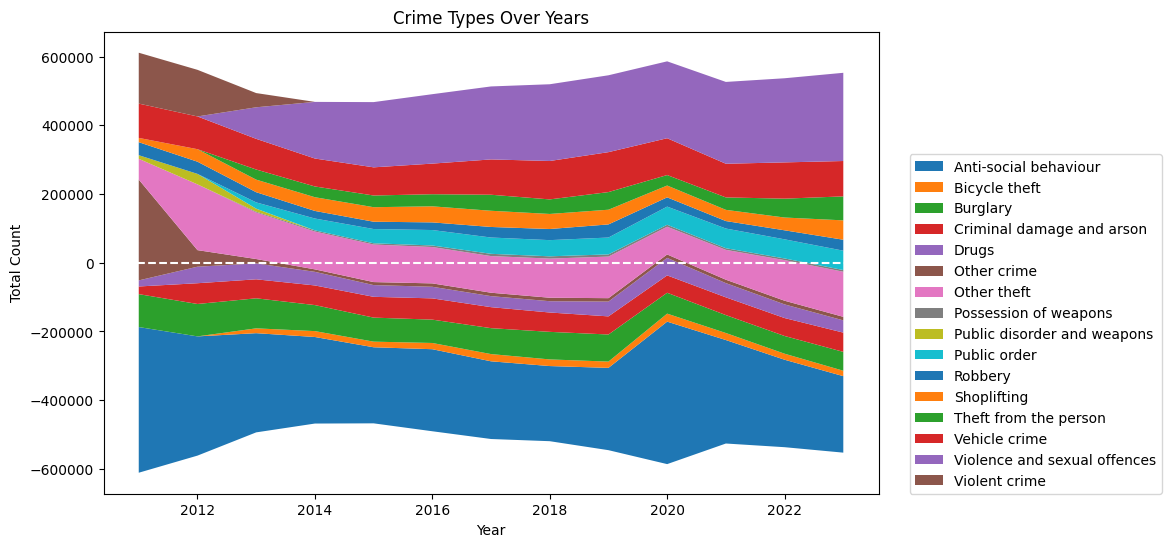

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(grouped_data.index, grouped_data.T, baseline='sym', labels=grouped_data.columns)
ax.legend(loc='upper left')
plt.title('Crime Types Over Years')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.axhline(y=0, color='w', linestyle='--')
ax.legend(loc=(1.04,0))
plt.show()

In [21]:
import numpy as np

In [22]:
# Compute the middle offset
mid = grouped_data.apply(lambda x: np.mean(x), axis=1)

# Create the Plotly figure
fig = go.Figure()

# Adding each crime type as a trace
for crime_type in grouped_data.columns:
    # Subtracting the mid value to center the data around the horizontal axis
    adjusted_values = grouped_data[crime_type] - mid
    fig.add_trace(go.Scatter(
        x=grouped_data.index,
        y=adjusted_values.cumsum(),  # Cumulative sum to stack the traces
        stackgroup='one',  # This setting groups traces to form a stack area plot
        name=crime_type
    ))

# Updating layout for better visual aesthetics
fig.update_layout(
    title='Crime Types Over Years (Streamgraph Approximation)',
    xaxis_title='Year',
    yaxis_title='Adjusted Total Count',
    legend_title='Crime Type',
    hovermode='x'
)

# Showing the plot
fig.show()

In [280]:
# ax = grouped_data.plot(kind='area', stacked=True)
# # ax.legend(loc=(1.04,0))

## Streamgraph for crimes per years

In [49]:
grouped_data = data[data['year'].between(2011, 2023)].groupby(['month', 'Crime type']).count()['Month'].reset_index()
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

total_counts = grouped_data.groupby(['month']).agg({'Month': 'sum'}).reset_index().rename(columns={'Month': 'total_count'})
grouped_data['month_name'] = grouped_data['month'].map(month_names)
# Merge total counts with grouped data with suffixes to avoid duplicate columns
grouped_data = pd.merge(grouped_data, total_counts, on=['month'], suffixes=('_grouped', '_total'))

# Calculate the percentage of each crime type within each year and month
grouped_data['percentage'] = (grouped_data['Month'] / grouped_data['total_count']) * 100
grouped_data = grouped_data.sort_values(by=['month'])

In [50]:
grouped_data

,month,Crime type,Month,month_name,total_count,percentage
0,1,Anti-social behaviour,261233,January,1082451,24.133471
15,1,Violent crime,33531,January,1082451,3.097692
14,1,Violence and sexual offences,167230,January,1082451,15.449198
13,1,Vehicle crime,110962,January,1082451,10.250995
12,1,Theft from the person,34094,January,1082451,3.149704
...,...,...,...,...,...,...
177,12,Bicycle theft,11103,December,1063477,1.044028
176,12,Anti-social behaviour,238621,December,1063477,22.437815
190,12,Violence and sexual offences,190246,December,1063477,17.889056
182,12,Other theft,132724,December,1063477,12.480195


In [53]:
fig = px.treemap(grouped_data, path=['month_name', 'Crime type'], values='Month',
                 title='Crime Frequency by Month', custom_data=['percentage'])
fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{customdata:.2f}%')

fig.show()

In [54]:
grouped_data = data[data['year'].between(2011, 2023)].groupby(['year', 'month', 'Crime type']).count()['Month'].reset_index()
# Combine year and month into a single column
grouped_data['year_month'] = grouped_data['year'].astype(str) + '-' + grouped_data['month'].astype(str)

# Map month numbers to names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
grouped_data['month_name'] = grouped_data['month'].map(month_names)

# Calculate the total count of crimes for each year and month
total_counts = grouped_data.groupby(['year', 'month']).agg({'Month': 'sum'}).reset_index().rename(columns={'Month': 'total_count'})

# Merge total counts with grouped data with suffixes to avoid duplicate columns
grouped_data = pd.merge(grouped_data, total_counts, on=['year', 'month'], suffixes=('_grouped', '_total'))

# Calculate the percentage of each crime type within each year and month
grouped_data['percentage'] = (grouped_data['Month'] / grouped_data['total_count']) * 100

# Sort years and months
grouped_data['year_month'] = pd.to_datetime(grouped_data['year_month'], format='%Y-%m')
grouped_data = grouped_data.sort_values(by=['year_month', 'Crime type'])

# Create treemap using Plotly
fig = px.treemap(grouped_data, path=['year', 'month_name', 'Crime type'], values='Month',
                 title='Crime Frequency by Year and Month', custom_data=['percentage'])

# Add annotations for percentage values
annotations = []
for index, row in grouped_data.iterrows():
    annotation = dict(
        x=row['year_month'],
        y=row['Month'] / 2,  # Position annotation in the middle of each rectangle
        text=f"{row['percentage']:.2f}%",
        showarrow=False
    )
    annotations.append(annotation)

# Update layout with annotations and hover template
fig.update_layout(annotations=annotations)
fig.update_traces(hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{customdata:.2f}%')

fig.show()

In [60]:
outcomes = pd.read_csv('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/metropolitan-outcomes.csv')

In [61]:
instersecting_crime_id = set(outcomes['Crime ID'].unique()).intersection((data[data['Crime ID'].isna()==False]['Crime ID'].unique()))

# Heatmap for crime type per its outcome

In [75]:
new_df = data[['Crime type', 'Last outcome category']]

In [76]:
ct_o = pd.pivot_table(data = new_df, index='Crime type', columns='Last outcome category', aggfunc=len, fill_value=0)

In [97]:
# Sort column names
pivot_table = ct_o.reindex(sorted(ct_o.columns), axis=1)

# Create heatmap using Plotly
fig = px.imshow(pivot_table.values,
                labels=dict(x="Last outcome category", y="Crime type", color="Count"),
                x=pivot_table.columns,
                y=pivot_table.index,
                color_continuous_scale='gray')

fig.update_layout(title='Crime Type vs Last Outcome Category Heatmap',
                  width=1000,  # Adjust width of the plot
                  height=600,  # Adjust height of the plot
                  margin=dict(l=50, r=50, t=100, b=100),  # Adjust margins
                  xaxis=dict(tickmode='array',tickangle=-45, tickvals=list(range(len(pivot_table.columns))), ticktext=pivot_table.columns),
                  yaxis=dict(tickmode='array', tickvals=list(range(len(pivot_table.index))), ticktext=pivot_table.index))
                  
fig.show()

In [103]:
y_ct_loc = data[['year', 'Crime type', 'Last outcome category']]
y_ct_loc = y_ct_loc[(y_ct_loc['Crime type'].isna() == False) & (y_ct_loc['Last outcome category'].isna() == False)]
# # Create treemap using Plotly
fig = px.treemap(y_ct_loc, path=['year', 'Crime type', 'Last outcome category'], title='Last Outcome Category per Crime Type per Year')

fig.show()

In [105]:
# outcomes = pd.read_csv('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/metropolitan-outcomes.csv')
instersecting_crime_id = list(set(outcomes['Crime ID'].unique()).intersection((data[data['Crime ID'].isna()==False]['Crime ID'].unique())))

In [106]:
import requests

In [126]:
requests.get('https://data.police.uk/api/outcomes-for-crime/daadac186672e371c7d82ae2ad461cddc71d1c42a377b9f64d7c7d9f0767bbe2').json()['outcomes'][0]['category']['name']

'Under investigation'

In [115]:
for i in requests.get('https://data.police.uk/api/outcomes-for-crime/daadac186672e371c7d82ae2ad461cddc71d1c42a377b9f64d7c7d9f0767bbe2').json()['outcomes']:
    print(i['date'][-2:])

01
03


In [119]:
lst = [int(i['date'][-2:]) for i in requests.get('https://data.police.uk/api/outcomes-for-crime/daadac186672e371c7d82ae2ad461cddc71d1c42a377b9f64d7c7d9f0767bbe2').json()['outcomes']]
result = lst[1] - lst[0]

AttributeError: 'list' object has no attribute 'subtract'

In [144]:
y_ct_loc = data[['borough', 'Crime type']]
y_ct_loc = y_ct_loc[(y_ct_loc['Crime type'].isna() == False)]
# # Create treemap using Plotly
fig = px.treemap(y_ct_loc, path=['borough', 'Crime type'], title='Poropotion of Crime Type per Boroughs in London (excluding City of London)')

fig.show()

In [169]:
sorted(data['year'].unique())

[2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024]

In [195]:
df_filtered = data[data['year'] == 2012][['Crime type', 'year', 'Last outcome category']].drop('year', axis = 1)

# Create pivot table with counts for each combination of Crime type, Last outcome category, and Year
pivot_table = df_filtered.pivot_table(index=['Crime type'], columns=['Last outcome category'], aggfunc=len, fill_value=-1)

In [196]:
pivot_table

Last outcome category,Awaiting court outcome,Court case unable to proceed,Court result unavailable,Defendant found not guilty,Defendant sent to Crown Court,Investigation complete; no suspect identified,Local resolution,Offender deprived of property,Offender fined,Offender given a caution,...,Offender given community sentence,Offender given conditional discharge,Offender given penalty notice,Offender given suspended prison sentence,Offender ordered to pay compensation,Offender otherwise dealt with,Offender sent to prison,Status update unavailable,Suspect charged as part of another case,Unable to prosecute suspect
Crime type,,,,,,,,,,,,,,,,,,,,,
Burglary,3,443,1138,785,8,36374,17,-1,49,154,...,479,52,2,468,6,28,1652,49812,2823,3
Criminal damage and arson,-1,252,867,623,-1,14863,24,-1,555,1876,...,656,670,288,140,262,131,426,38652,42,-1
Drugs,-1,371,1947,367,2,5313,114,272,3938,3636,...,1268,1147,2782,315,46,118,1142,10133,5,11
Other crime,2,309,1690,657,2,24186,4,4,232,888,...,571,123,2,442,15,29,937,17930,131,-1
Other theft,2,236,1293,447,8,75907,33,-1,196,957,...,636,182,11,333,18,47,826,109754,514,2
Public disorder and weapons,-1,712,1805,1534,1,10001,28,6,944,1168,...,1182,469,1100,523,42,179,1250,9489,3,3
Robbery,-1,219,675,989,-1,18497,5,-1,9,53,...,754,31,-1,176,5,24,1072,12741,189,-1
Shoplifting,1,183,1868,323,3,11596,176,-1,1192,1818,...,1427,1249,2844,629,47,134,2600,10126,102,-1
Vehicle crime,-1,180,765,352,1,20878,10,-1,137,130,...,394,92,-1,137,9,42,394,70150,1588,-1


In [197]:
pivot_table.columns

Index(['Awaiting court outcome', 'Court case unable to proceed',
       'Court result unavailable', 'Defendant found not guilty',
       'Defendant sent to Crown Court',
       'Investigation complete; no suspect identified', 'Local resolution',
       'Offender deprived of property', 'Offender fined',
       'Offender given a caution', 'Offender given a drugs possession warning',
       'Offender given absolute discharge',
       'Offender given community sentence',
       'Offender given conditional discharge', 'Offender given penalty notice',
       'Offender given suspended prison sentence',
       'Offender ordered to pay compensation', 'Offender otherwise dealt with',
       'Offender sent to prison', 'Status update unavailable',
       'Suspect charged as part of another case',
       'Unable to prosecute suspect'],
      dtype='object', name='Last outcome category')

In [198]:
def create_heatmap_per_year(df):
    # Filter data for years 2011-2023
    years = range(2012, 2024)
    
    for year in years:
        # Filter data for the current year
        df_filtered = df[df['year'] == year].drop('year', axis = 1)

        # Create pivot table with counts for each combination of Crime type, Last outcome category, and Year
        pivot_table = df_filtered.pivot_table(index=['Crime type'], columns=['Last outcome category'], aggfunc=len, fill_value=0)

        # Create heatmap using Plotly
        fig = px.imshow(pivot_table.values,
                        labels=dict(x="Last outcome category", y="Crime type", color="Count"),
                        x=pivot_table.columns,
                        y=pivot_table.index,
                        color_continuous_scale='viridis')

        fig.update_layout(title=f'Crime Type and Last Outcome Category Heatmap for Year {year}',
                          width=800,  # Adjust width of the plot
                          height=600,  # Adjust height of the plot
                          margin=dict(l=50, r=50, t=100, b=100),  # Adjust margins
                          xaxis=dict(tickangle=-45),  # Rotate x-axis labels by -45 degrees
                          yaxis=dict(tickmode='array', tickvals=list(range(len(pivot_table.index))), ticktext=pivot_table.index))  # Disable aspect ratio constraint

        fig.show()

In [199]:
create_heatmap_per_year(data[['Crime type', 'Last outcome category', 'year']])

In [200]:
# crime_time = {}
# for crime_id in tqdm(instersecting_crime_id, total = len(instersecting_crime_id)):
#     try:
#         get_data = requests.get(f'https://data.police.uk/api/outcomes-for-crime/{crime_id}').json()['outcomes']

#         crime_name = get_data[0]['category']['name']
#         lst = [int(i['date'][-2:]) for i in requests.get('https://data.police.uk/api/outcomes-for-crime/daadac186672e371c7d82ae2ad461cddc71d1c42a377b9f64d7c7d9f0767bbe2').json()['outcomes']]
#         result = lst[1] - lst[0]
#         if crime_name not in crime_time.keys():
            
#             crime_time[crime_name] = [result]
#         else:
#             crime_time[crime_name].append(result)
#     except Exception as e:
#         print(f'[INFO] Crime ID {crime_id} is either null or is empty')

In [4]:
data = data.drop_duplicates(keep = 'first')

In [5]:
data

,Unnamed: 0,Crime ID,Month,Longitude,Latitude,Location,LSOA code,Crime type,Last outcome category,borough,month,year
0,0,NaN,2014-06,0.133181,51.586719,On or near Rosehatch Avenue,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
1,1,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
2,2,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
3,3,7b80615f37c236b21945720f533e79857ef85ccecdb23f...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,6,2014
4,4,a912be379fe71146d71cf88a6f084fe839ff915ae321fc...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Status update unavailable,Barking and Dagenham,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
13931517,14130047,b3085b9fdc834c734d82aa7ec575d2dab72e6fabc231f0...,2018-12,-0.135811,51.489686,On or near Moreton Street,E01004741,Vehicle crime,Status update unavailable,Westminster,12,2018
13931518,14130048,2eac6a4562891e535bfb27fd74cb099ff49cf76d731969...,2018-12,-0.133146,51.488987,On or near Bessborough Street,E01004741,Violence and sexual offences,Investigation complete; no suspect identified,Westminster,12,2018
13931519,14130049,b1934014f2d40a44ad55ddf08956f9cdca019cfba2bcd8...,2018-12,-0.133146,51.488987,On or near Bessborough Street,E01004741,Violence and sexual offences,Investigation complete; no suspect identified,Westminster,12,2018
13931520,14130050,3204e63a71d6b2a615794885d485ffe88114814701468f...,2018-12,-0.135811,51.489686,On or near Moreton Street,E01004741,Violence and sexual offences,Status update unavailable,Westminster,12,2018


In [7]:
new_data = data[data['year'].between(2014, 2023)]
new_data[(new_data['Latitude'].isna() == False) & (new_data['Longitude'].isna() == False)]

,Unnamed: 0,Crime ID,Month,Longitude,Latitude,Location,LSOA code,Crime type,Last outcome category,borough,month,year
0,0,NaN,2014-06,0.133181,51.586719,On or near Rosehatch Avenue,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
1,1,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
2,2,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014
3,3,7b80615f37c236b21945720f533e79857ef85ccecdb23f...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,6,2014
4,4,a912be379fe71146d71cf88a6f084fe839ff915ae321fc...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Status update unavailable,Barking and Dagenham,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
13931517,14130047,b3085b9fdc834c734d82aa7ec575d2dab72e6fabc231f0...,2018-12,-0.135811,51.489686,On or near Moreton Street,E01004741,Vehicle crime,Status update unavailable,Westminster,12,2018
13931518,14130048,2eac6a4562891e535bfb27fd74cb099ff49cf76d731969...,2018-12,-0.133146,51.488987,On or near Bessborough Street,E01004741,Violence and sexual offences,Investigation complete; no suspect identified,Westminster,12,2018
13931519,14130049,b1934014f2d40a44ad55ddf08956f9cdca019cfba2bcd8...,2018-12,-0.133146,51.488987,On or near Bessborough Street,E01004741,Violence and sexual offences,Investigation complete; no suspect identified,Westminster,12,2018
13931520,14130050,3204e63a71d6b2a615794885d485ffe88114814701468f...,2018-12,-0.135811,51.489686,On or near Moreton Street,E01004741,Violence and sexual offences,Status update unavailable,Westminster,12,2018


In [8]:
# Load JSON data from file
with open('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/boroughs_neighbourhoods.json', 'r') as file:
    json_data = json.load(file)

# Convert JSON data to a DataFrame
boroughs_data = []
for borough, area_codes in json_data.items():
    for area_code in area_codes:
        boroughs_data.append({'Borough': borough, 'Area Code': area_code})

boroughs_neighbours = pd.DataFrame(boroughs_data)
boroughs_neighbours

,Borough,Area Code
0,Tower Hamlets,E05009317
1,Tower Hamlets,E05009318
2,Tower Hamlets,E05009319
3,Tower Hamlets,E05009320
4,Tower Hamlets,E05009321
...,...,...
674,Lambeth,E05014115
675,Lambeth,E05014116
676,Lambeth,E05014117
677,Lambeth,E05014118


In [9]:
boroughs_neighbours[boroughs_neighbours['Borough'] == 'Kingston upon Thames']['Area Code'].to_list()

['E05013928',
 'E05013929',
 'E05013930',
 'E05013931',
 'E05013932',
 'E05013933',
 'E05013934',
 'E05013935',
 'E05013936',
 'E05013937',
 'E05013938',
 'E05013939',
 'E05013940',
 'E05013941',
 'E05013942',
 'E05013943',
 'E05013944',
 'E05013945',
 'E05013946']

In [17]:
import requests

In [19]:
import json
import requests
from shapely.geometry import Point, Polygon
from tqdm import tqdm

# Load the neighborhood boundaries and boroughs from the JSON file
json_file_path = "/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/neighborhood_boundaries.json"

with open(json_file_path, "r") as json_file:
    neighborhood_data = json.load(json_file)

# Total rows to process
total_rows = len(new_data)

with tqdm(total=total_rows) as pbar:
    def get_neighbourhood(data):
        borough = data['borough']
        
        # Check if the borough exists in the loaded neighborhood data
        if borough in neighborhood_data:
            neighbourhoods = neighborhood_data[borough]
            for neighborhood in neighbourhoods:
                # Extract the neighborhood name and its boundary points
                neighborhood_name, boundary_points = list(neighborhood.items())[0]
                
                # Sample point with latitude and longitude
                point_to_check = Point(data['Latitude'], data['Longitude'])

                # Convert the boundary points into a list of (x, y) coordinates
                boundary_coordinates = [(lat, lon) for lat, lon in boundary_points]

                # Create a Polygon geometry from the boundary coordinates
                boundary_polygon = Polygon(boundary_coordinates)

                # Check if the point falls within the Polygon geometry
                if point_to_check.within(boundary_polygon):
                    pbar.update(1)
                    return neighborhood_name

    # Apply the function to each row in new_data
    new_data['neighbourhood'] = new_data.apply(get_neighbourhood, axis=1)


100%|█████████▉| 10375693/10415133 [20:48:14<00:40, 962.68it/s]    /var/folders/9z/6v7l930d5d3fnhz8w_cp8_gw0000gn/T/ipykernel_29923/3330573140.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['neighbourhood'] = new_data.apply(get_neighbourhood, axis=1)
100%|█████████▉| 10375693/10415133 [20:48:14<04:44, 138.54it/s]


In [20]:
# Assuming df is your DataFrame
new_data.to_csv('/Users/ansat.omurzakov/Desktop/TUe/Data Challenge 2/data/metropolitan-street-new.csv', index=False) 

In [22]:
new_data

,Unnamed: 0,Crime ID,Month,Longitude,Latitude,Location,LSOA code,Crime type,Last outcome category,borough,month,year,neighbourhood
0,0,NaN,2014-06,0.133181,51.586719,On or near Rosehatch Avenue,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014,E05014058
1,1,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014,E05014058
2,2,NaN,2014-06,0.134947,51.588063,On or near Mead Grove,E01000027,Anti-social behaviour,NaN,Barking and Dagenham,6,2014,E05014058
3,3,7b80615f37c236b21945720f533e79857ef85ccecdb23f...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,6,2014,E05014058
4,4,a912be379fe71146d71cf88a6f084fe839ff915ae321fc...,2014-06,0.140634,51.583427,On or near Rams Grove,E01000027,Burglary,Status update unavailable,Barking and Dagenham,6,2014,E05014058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13931517,14130047,b3085b9fdc834c734d82aa7ec575d2dab72e6fabc231f0...,2018-12,-0.135811,51.489686,On or near Moreton Street,E01004741,Vehicle crime,Status update unavailable,Westminster,12,2018,E05013802N
13931518,14130048,2eac6a4562891e535bfb27fd74cb099ff49cf76d731969...,2018-12,-0.133146,51.488987,On or near Bessborough Street,E01004741,Violence and sexual offences,Investigation complete; no suspect identified,Westminster,12,2018,E05013803
13931519,14130049,b1934014f2d40a44ad55ddf08956f9cdca019cfba2bcd8...,2018-12,-0.133146,51.488987,On or near Bessborough Street,E01004741,Violence and sexual offences,Investigation complete; no suspect identified,Westminster,12,2018,E05013803
13931520,14130050,3204e63a71d6b2a615794885d485ffe88114814701468f...,2018-12,-0.135811,51.489686,On or near Moreton Street,E01004741,Violence and sexual offences,Status update unavailable,Westminster,12,2018,E05013802N


In [234]:
tuple_list = [(item['latitude'], item['longitude']) for item in requests.get('https://data.police.uk/api/metropolitan/E05013946/boundary').json()]

In [238]:
from shapely.geometry import Point, Polygon

# Sample point with latitude and longitude
point_to_check = Point(51.428662,-0.305841)

# Sample list of tuples containing latitude and longitude pairs for the boundary points
boundary_points = tuple_list

# Convert the boundary points into a list of (x, y) coordinates
boundary_coordinates = [(lat, lon) for lat, lon in boundary_points]

# Create a Polygon geometry from the boundary coordinates
boundary_polygon = Polygon(boundary_coordinates)

# Check if the point falls within the Polygon geometry
if point_to_check.within(boundary_polygon):
    print("Point falls within the boundary polygon.")
else:
    print("Point does not fall within the boundary polygon.")

Point falls within the boundary polygon.


In [218]:
new_data[new_data['borough'] == 'Kingston upon Thames'][['Longitude', 'Latitude', 'borough']]

,Longitude,Latitude,borough
46741,-0.305841,51.428662,Kingston upon Thames
46742,-0.304449,51.427401,Kingston upon Thames
46743,-0.310675,51.430197,Kingston upon Thames
46744,-0.309123,51.430939,Kingston upon Thames
46745,-0.297960,51.428215,Kingston upon Thames
...,...,...,...
13896055,-0.298572,51.357093,Kingston upon Thames
13896056,-0.306109,51.357580,Kingston upon Thames
13896057,-0.304759,51.357947,Kingston upon Thames
13896058,-0.306109,51.357580,Kingston upon Thames
